# Introduction to pandas

* **pandas** is a Python package providing convenient data structures to work with labelled data.

* **pandas** is perfectly suited for observational / statistical data sets, having many similarities with Excel spreadsheets.

* Key features:

    - easy handling of **missing data**
    - **size mutability**: columns can be inserted and deleted from DataFrame
    - automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
    - powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets
    - make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
    - intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets
    - intuitive **merging** and **joining** data sets
    - flexible **reshaping** and pivoting of data sets
    - **hierarchical** labeling of axes (possible to have multiple labels per tick)
    - robust IO tools for loading data from **flat files** (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
    - **time series**-specific functionality

### Primary data structures of pandas
* **Series** (1-dimensional)
* **DataFrame** (2-dimensional)

pandas is built on top of **NumPy** and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

## Loading data

* In this session, we will use observations of the air quality as an example
* The data have been collected **hourly** from one of the monitoring sites in London (Marleybone Road) **over the year 2015**
* Measured are: ozone ($O_3$), nitrogen oxides (NOx), carbon monoxide (CO) and PM10 particulate matter

First, we import pandas module. We use an alias "pd" to write code quicker.

In [1]:
import pandas as pd

We also import the `os` module that is useful for building paths to files (among many other things). And `numpy` with `matplotlib` just in case too.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_path = os.path.join(os.path.pardir, 'data')
fname = os.path.join(data_path, 'north_sea_data.csv')

Let's try to read the data using `pandas.read_csv()` function.

In [8]:
# minimal setup to read the given file
df = pd.read_csv(fname, parse_dates={'date': [2, 3]})
df.head()

,date,Latdeg,Longdeg,depth(m),TEMP,Salinity,DOXY(umol/l)
0,1990-01-01,53.9167,4.5000,4.0,7.40,34.69,386.32
1,1990-01-01,54.8333,6.5000,4.0,7.80,34.96,357.29
2,1986-02-01,55.7333,6.6667,10.0,2.13,34.08,338.98
3,1986-02-01,55.7333,6.6667,15.0,2.20,34.11,336.74
4,1986-02-01,55.7333,6.6667,20.0,2.30,34.13,341.21


## Data structures: `DataFrame` and `Series`

Let's interrogate the `DataFrame` object!

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# Internal nature of the object
print(df.shape)
print()
print(df.dtypes)

(4595, 7)

date            datetime64[ns]
Latdeg                 float64
Longdeg                float64
depth(m)               float64
TEMP                   float64
Salinity               float64
DOXY(umol/l)           float64
dtype: object


In [11]:
# View just the tip of data
df.head()

,date,Latdeg,Longdeg,depth(m),TEMP,Salinity,DOXY(umol/l)
0,1990-01-01,53.9167,4.5000,4.0,7.40,34.69,386.32
1,1990-01-01,54.8333,6.5000,4.0,7.80,34.96,357.29
2,1986-02-01,55.7333,6.6667,10.0,2.13,34.08,338.98
3,1986-02-01,55.7333,6.6667,15.0,2.20,34.11,336.74
4,1986-02-01,55.7333,6.6667,20.0,2.30,34.13,341.21


**Q:** What did you notice about "Status" columns? Compare them to the original text file.

In [12]:
# View the last rows of data
df.tail(n=2)  # Note the optional argument (available for head() too)

,date,Latdeg,Longdeg,depth(m),TEMP,Salinity,DOXY(umol/l)
4593,2002-12-01,53.8333,6.3833,25.0,10.396,32.501,267.52
4594,2002-12-01,53.6733,6.5000,11.0,9.000,31.130,276.00


Get descriptors for the **vertical** axis (axis=0):

In [13]:
df.index

RangeIndex(start=0, stop=4595, step=1)

Get descriptors for the horizontal axis (axis=1):

In [14]:
df.columns

Index(['date', 'Latdeg', 'Longdeg', 'depth(m)', 'TEMP', 'Salinity',
       'DOXY(umol/l)'],
      dtype='object')

A lot of information at once including memory usage:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 7 columns):
date            4595 non-null datetime64[ns]
Latdeg          4595 non-null float64
Longdeg         4595 non-null float64
depth(m)        4595 non-null float64
TEMP            4595 non-null float64
Salinity        4595 non-null float64
DOXY(umol/l)    4595 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 251.4 KB


### Series, pandas' 1D data containter

A series can be constructed with the `pd.Series` constructor (passing an array of values) or from a `DataFrame`, by extracting one of its columns.

In [24]:
oxygen = df['DOXY(umol/l)']

Some of its attributes:

In [25]:
print(type(oxygen))
print(oxygen.dtype)
print(oxygen.shape)
print(oxygen.nbytes)

<class 'pandas.core.series.Series'>
float64
(4595,)
36760


Show me what you got! <img src=https://staticdelivery.nexusmods.com/mods/1151/images/543-1-1447533110.png style="width:40px;">

In [26]:
oxygen

0       386.32
1       357.29
2       338.98
3       336.74
4       341.21
5       337.64
6       338.53
7       337.19
8       335.40
9       336.30
10      338.53
11      336.74
12      331.38
13      338.98
14      351.48
15      337.64
16      340.32
17      337.64
18      335.40
19      353.71
20      351.48
21      344.78
22      340.32
23      358.18
24      349.69
25      348.35
26      347.01
27      346.12
28      341.21
29      339.87
         ...  
4565    321.56
4566    321.56
4567    321.56
4568    321.56
4569    321.56
4570    316.20
4571    316.65
4572    317.09
4573    317.09
4574    317.09
4575    316.65
4576    311.73
4577    320.66
4578    320.66
4579    320.66
4580    320.66
4581    320.66
4582    325.13
4583    331.38
4584    296.99
4585    322.00
4586    325.13
4587    322.00
4588    260.37
4589    270.64
4590    269.75
4591    268.86
4592    268.41
4593    267.52
4594    276.00
Name: DOXY(umol/l), dtype: float64

### Numpy as pandas's backend

It is always possible to fall back to a good old NumPy array to pass on to scientific libraries that need them: SciPy, scikit-learn, etc

In [27]:
df['DOXY(umol/l)'].values

array([ 386.32,  357.29,  338.98, ...,  268.41,  267.52,  276.  ])

In [21]:
type(df['DOXY(umol/l)'].values)

numpy.ndarray

## Creating DataFrames

* `DataFrame` can also be created manually, by grouping several `Series` together.
* Let's make a new frame from the data we already have

In [28]:
temperature = df['TEMP']
salinity = df.Salinity

In [29]:
new_df = pd.DataFrame({'oxygen': oxygen,
                       'salinity': salinity,
                       'Date': df['date']})

In [30]:
new_df.head()

,Date,oxygen,salinity
0,1990-01-01,386.32,34.69
1,1990-01-01,357.29,34.96
2,1986-02-01,338.98,34.08
3,1986-02-01,336.74,34.11
4,1986-02-01,341.21,34.13


## Cleaning data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

### Dealing with dates and times

In [ ]:
# def dateparse(date_str, time_str):
#     diff = pd.to_timedelta((df['End Date'] == '24:00:00').astype(int), unit='d')
#     pd.datetime.strptime(x+y, '%Y-%m-%d%H:%M:%S') 

In [31]:
# df = pd.read_csv(fname, header=4, skipfooter=4, na_values='No data', engine='python',
#                           parse_dates={'Time': [0, 1]})

### Renaming columns

In [32]:
df.columns

Index(['date', 'Latdeg', 'Longdeg', 'depth(m)', 'TEMP', 'Salinity',
       'DOXY(umol/l)'],
      dtype='object')

In [33]:
df.columns = ['Time', 'lat', 'lon', 'depth', 'temperature', 'salinity', 'dissolved_oxygen']
df.columns

Index(['Time', 'lat', 'lon', 'depth', 'temperature', 'salinity',
       'dissolved_oxygen'],
      dtype='object')

### Deleting columns

Let us concentrate our attention on the first 4 chemical species, and remove cobalt data from our `DataFrame`:

In [ ]:
df = df.drop('Co', 1)
df = df.drop('Co_status', 1)

In [ ]:
df.head()

## Basic visualisation

### Exercise

Try calling `plot()` method of the `df` object:

In [ ]:
# df.plot()

What happens if put `subplots=True` as an argument of the `plot()` method?

In [ ]:
# df.plot( ... )

It is easy to create other useful plots using `DataFrame`:

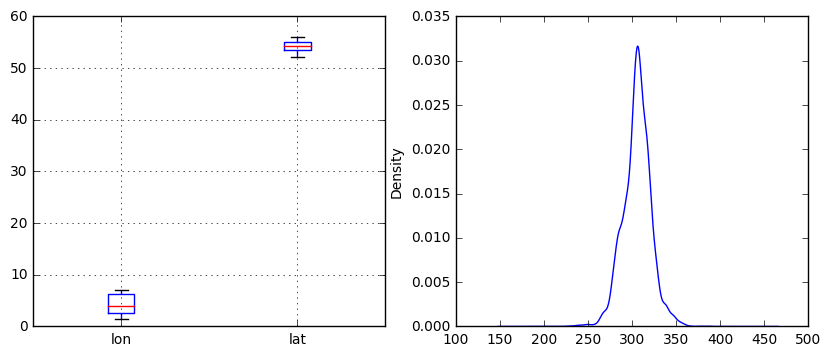

In [36]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
df.boxplot(ax=ax0, column=['lon', 'lat'])
df.dissolved_oxygen.plot(ax=ax1, kind="kde")

As well as just a simple line plot:

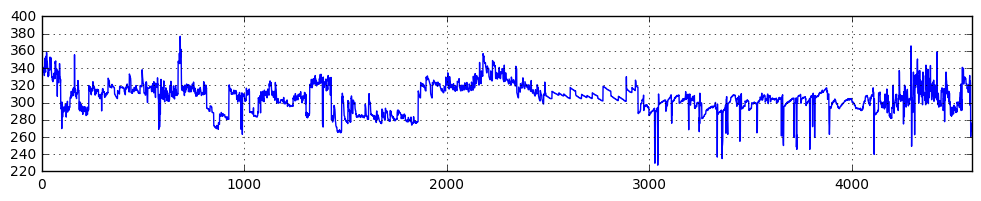

In [38]:
df.dissolved_oxygen.plot(grid=True, figsize=(12, 2))

### Setting missing values

As you may notice, we have negative values of ozone concentration, which does not make sense. So, let us replace those negative values with NaN:

In [ ]:
df[df.sa.values < 0]

We can mask them out in the same way as you do with numpy arrays:

In [ ]:
# Replace negative ozone values with NaN
df.O3[df.O3.values < 0] = np.nan

## Saving data

For each `read_**` function to load data, there is a `to_**` method attached to `Series` and `DataFrames`.

#### Excel spreadsheets

Uncomment the following code cell and run to save the whole `DataFrame` to an Excel file.

In [ ]:
# with pd.ExcelWriter("test.xls") as our_writer:
#     df.to_excel(writer, sheet_name='Blah-blah')

#### Exercise: writing to CSV text files

Find a method to save `DataFrames` to a text file (or whatever format you like more).

In [ ]:
# Your code here

## Some statistics

In [ ]:
df.describe()

## Correlations and regressions

* Is there correlations between the timeseries we loaded?
* First, let's take a glance at the whole `DataFrame` using a fancy `scatter_matrix` function.

In [39]:
from pandas.tools.plotting import scatter_matrix

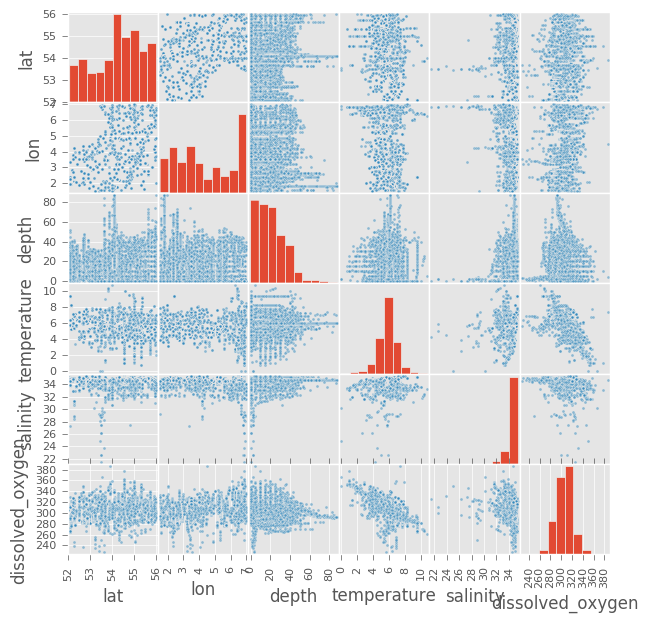

In [40]:
with plt.style.context('ggplot'):
    scatter_matrix(df, figsize=(7, 7))

## Computing correlations

Both `Series` and `DataFrames` have a **`corr()`** method to compute the correlation coefficient.

In [41]:
df.dissolved_oxygen.corr(df['temperature'])

-0.66735817480409931

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [42]:
df.corr()

,lat,lon,depth,temperature,salinity,dissolved_oxygen
lat,1.000000,0.544980,0.121279,-0.256680,0.077123,0.181696
lon,0.544980,1.000000,-0.070748,-0.233505,-0.199720,0.319886
depth,0.121279,-0.070748,1.000000,0.023000,0.174395,-0.063373
temperature,-0.256680,-0.233505,0.023000,1.000000,0.222097,-0.667358
salinity,0.077123,-0.199720,0.174395,0.222097,1.000000,-0.240382
dissolved_oxygen,0.181696,0.319886,-0.063373,-0.667358,-0.240382,1.000000


If you want to visualise this correlation matrix, uncomment the following code cell.

In [ ]:
# fig, ax = plt.subplots()
# p = ax.imshow(df.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
# ax.set_xticks(np.arange(len(df.corr().columns)))
# ax.set_yticks(np.arange(len(df.corr().index)))
# ax.set_xticklabels(df.corr().columns)
# ax.set_yticklabels(df.corr().index)
# fig.colorbar(p)

### Ordinary Least Square (OLS) regressions 

<img src=http://statsmodels.sourceforge.net/devel/_static/statsmodels_hybi_banner.png>

The recommeded way to build ordinaty least square regressions is by using `statsmodels`.

In [43]:
import statsmodels.formula.api as sm

In [44]:
sm_model = sm.ols(formula="dissolved_oxygen ~ temperature", data=df).fit()

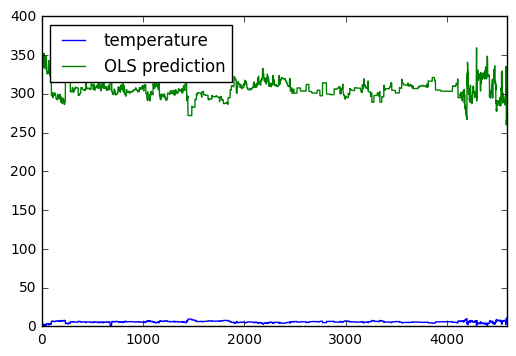

In [45]:
df["temperature"].plot()
ax = sm_model.fittedvalues.plot(label="OLS prediction")
ax.legend(loc="upper left")

## Exercise: rolling functions

In [ ]:
# with plt.style.context('ggplot'):
#     df.NOx[:24*10].plot()
#     rolled_series = df.NOx[:24*10].rolling(window=10, center=False)
#     # print(rolled_series)
#     rolled_series.median().plot(lw=2)

## References
* https://github.com/jonathanrocher/pandas_tutorial
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html

* Data source: https://uk-air.defra.gov.uk/data/
* Site description: https://uk-air.defra.gov.uk/networks/site-info?uka_id=UKA00315